Download data

In [13]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [14]:
# !ls gdrive/MyDrive/PED
# df = pandas.read_csv('gdrive/MyDrive/PED/reddit_wsb.csv')

In [15]:
import pandas
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
%matplotlib inline

df = pandas.read_csv('../data/reddit_wsb.csv')
df["body"] = df["body"].fillna('')
df["title"] = df["title"].fillna('')

df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,score,id,url,comms_num,created,body,timestamp,upvote_ratio,is_oc,permalink,name
0,Due to all the manipulation happening on sever...,4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,1.611768e+09,Many trading platforms have disabled the abili...,Wed Jan 27 18:18:38 2021,0.75,False,/r/wallstreetbets/comments/l69fvk/due_to_all_t...,t3_l69fvk
1,Holding GME till the squeeze has squoze. 6421@21,1156,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,1.611962e+09,,Sat Jan 30 00:12:20 2021,0.99,False,/r/wallstreetbets/comments/l87ci6/holding_gme_...,t3_l87ci6
2,Going long on my dick,0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,1.612416e+09,A month ago I found out that I have a big dick...,Thu Feb 4 06:17:59 2021,0.40,False,/r/wallstreetbets/comments/lc8dnh/going_long_o...,t3_lc8dnh
3,"TASTYWORKS IS ALSO SETTING ""CERTAIN"" STOCKS TO...",3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611852e+09,"""Apex Clearing, who acts as the custodian of a...",Thu Jan 28 17:35:13 2021,1.00,False,/r/wallstreetbets/comments/l71knz/tastyworks_i...,t3_l71knz
4,PLEASE HELP THIS IS A DUMBASS FUCKING QUESTION,3,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,1.611849e+09,I\u2019ve been following for a couple years......,Thu Jan 28 16:45:57 2021,0.67,False,/r/wallstreetbets/comments/l70720/please_help_...,t3_l70720
...,...,...,...,...,...,...,...,...,...,...,...,...
38903,Damn.. with the government getting involved an...,0,l6b99w,https://www.reddit.com/r/wallstreetbets/commen...,15,1.611772e+09,I don\u2019t have much.. but I\u2019d rather n...,Wed Jan 27 19:32:50 2021,0.41,False,/r/wallstreetbets/comments/l6b99w/damn_with_th...,t3_l6b99w
38904,DONT BE FOOLED BY PRICE DROP IN $AMC. THE VOLU...,15,l6zb4b,https://i.redd.it/c4xkr2zwa3e61.jpg,2,1.611847e+09,,Thu Jan 28 16:15:16 2021,0.86,False,/r/wallstreetbets/comments/l6zb4b/dont_be_fool...,t3_l6zb4b
38905,For everyone searching by new who wants to buy...,75,l70tgo,https://www.reddit.com/r/wallstreetbets/commen...,10,1.611850e+09,This is according to other users in the commen...,Thu Jan 28 17:09:14 2021,1.00,False,/r/wallstreetbets/comments/l70tgo/for_everyone...,t3_l70tgo
38906,Why buy GME now,0,lcgmi4,https://www.reddit.com/r/wallstreetbets/commen...,19,1.612448e+09,Can you retards explain to me why anyone shoul...,Thu Feb 4 15:20:37 2021,0.29,False,/r/wallstreetbets/comments/lcgmi4/why_buy_gme_...,t3_lcgmi4


In [16]:
seconds_in_day = 60 * 60 * 24.
df['sin_time'] = np.sin(2*np.pi*(df.created % seconds_in_day)/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*(df.created % seconds_in_day)/seconds_in_day)

Data summary

In [17]:
df.describe()

,score,comms_num,created,upvote_ratio,sin_time,cos_time
count,38908.000000,38908.000000,3.890800e+04,38908.000000,38908.000000,38908.000000
mean,1067.850982,163.336332,1.611946e+09,0.850351,-0.633535,-0.172791
std,8307.709085,2618.299354,2.937302e+05,0.177996,0.495768,0.568335
min,0.000000,0.000000,1.611054e+09,0.000000,-1.000000,-1.000000
25%,7.000000,2.000000,1.611770e+09,0.790000,-0.951130,-0.624448
50%,22.000000,7.000000,1.611849e+09,0.920000,-0.818359,-0.316891
75%,102.000000,23.000000,1.612209e+09,0.980000,-0.591002,0.177299
max,403113.000000,97998.000000,1.613038e+09,1.000000,1.000000,1.000000


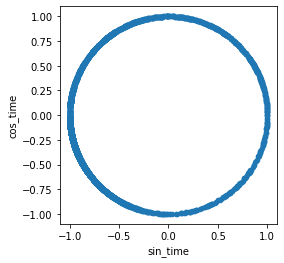

In [18]:
df.sample(5000).plot.scatter('sin_time','cos_time').set_aspect('equal')

In [19]:
df.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp', 'upvote_ratio', 'is_oc', 'permalink', 'name', 'sin_time',
       'cos_time'],
      dtype='object')

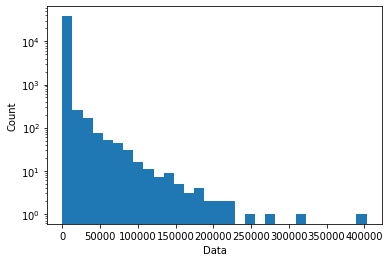

In [20]:
plt.hist(df['score'], bins=30)
plt.ylabel('Count')
plt.yscale('log')
plt.xlabel('Data');

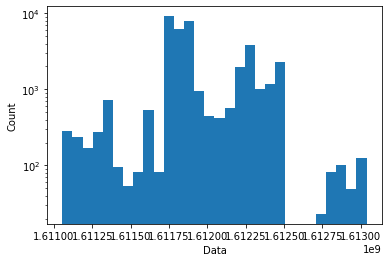

In [21]:
plt.hist(df['created'], bins=30)
plt.ylabel('Count')
plt.yscale('log')
plt.xlabel('Data');

Text processing

In [22]:
#!pip install emoji
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import emoji
import re
tokenizer = nltk.RegexpTokenizer(r"\w+")

nltk.download('stopwords')
# tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luker\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Most common words

In [23]:
body_most_common = Counter(word_tokenize(" ".join(df["body"])))
for key, cnts in list(body_most_common.items()):
  if not key in emoji.UNICODE_EMOJI and (key in stopwords.words('english') or not re.match(r'\w+',key)):
    del body_most_common[key]
body_most_common = body_most_common.most_common(100)
body_most_common


[('I', 29299),
 ('it', 17451),
 ('GME', 10161),
 ('https', 8313),
 ("n't", 8091),
 ('stock', 6171),
 ('shares', 6017),
 ('like', 5799),
 ('buy', 5085),
 ('short', 5029),
 ('market', 4878),
 ('The', 4805),
 ('people', 4639),
 ('get', 4635),
 ('price', 4492),
 ('money', 4360),
 ('know', 4219),
 ('This', 4104),
 ('going', 3895),
 ('would', 3878),
 ('us', 3571),
 ('AMC', 3468),
 ('x200B', 3449),
 ('make', 3302),
 ('one', 3296),
 ('time', 3181),
 ('They', 3060),
 ('sell', 2990),
 ('still', 2951),
 ('see', 2912),
 ('think', 2908),
 ('go', 2906),
 ('We', 2863),
 ('THE', 2863),
 ('If', 2849),
 ('Robinhood', 2783),
 ('stocks', 2766),
 ('could', 2714),
 ('want', 2699),
 ('even', 2669),
 ('back', 2610),
 ('company', 2599),
 ('new', 2568),
 ('trading', 2551),
 ('squeeze', 2442),
 ('It', 2426),
 ('hedge', 2306),
 ('funds', 2279),
 ('right', 2264),
 ('fucking', 2237),
 ('financial', 2230),
 ('buying', 2210),
 ('hold', 2194),
 ('also', 2169),
 ('way', 2125),
 ('need', 2087),
 ('take', 2072),
 ('much'

In [24]:
title_most_common = Counter(word_tokenize(" ".join(df["title"])))
for key, cnts in list(title_most_common.items()):
  if not key in emoji.UNICODE_EMOJI and (key in stopwords.words('english') or not re.match(r'\w+',key)):
    del title_most_common[key]
title_most_common = title_most_common.most_common(100)
title_most_common

[('GME', 8053),
 ('I', 7983),
 ('AMC', 3792),
 ('it', 2836),
 ('THE', 2809),
 ('Robinhood', 2197),
 ('HOLD', 2123),
 ('NOK', 2095),
 ('buy', 1881),
 ('BB', 1874),
 ('TO', 1711),
 ("n't", 1408),
 ('BUY', 1385),
 ('The', 1253),
 ('stock', 1009),
 ('shares', 1009),
 ('still', 1003),
 ('AND', 978),
 ('We', 977),
 ('like', 949),
 ('This', 927),
 ('sell', 923),
 ('WE', 903),
 ('get', 901),
 ('What', 898),
 ('holding', 882),
 ('us', 876),
 ('IS', 871),
 ('moon', 869),
 ('going', 840),
 ('A', 829),
 ('YOU', 808),
 ('NOT', 787),
 ('hold', 786),
 ('go', 778),
 ('today', 759),
 ('WSB', 728),
 ('It', 716),
 ('trading', 671),
 ('market', 669),
 ('money', 660),
 ('buying', 650),
 ('You', 639),
 ('bought', 637),
 ('short', 636),
 ('stocks', 626),
 ('let', 621),
 ('MOON', 620),
 ('RH', 618),
 ('THIS', 574),
 ('They', 570),
 ('Just', 564),
 ('time', 561),
 ('If', 551),
 ('guys', 551),
 ('ON', 545),
 ('How', 542),
 ('dip', 521),
 ('know', 518),
 ('Hold', 518),
 ('selling', 517),
 ('right', 513),
 ('FUCK

Parameters creation

In [25]:
additional_keywords = ['gme', 'hold', 'buy', 'retard', 'wife', 'hedgies', '🚀', 'moon','🧻','🙏', '💎', '🤲','✋','🙌🏼', '🦍', '👋🏼']
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
text_attributes = {}
for key in additional_keywords: 
  text_attributes['title_' + key] = df["title"].str.lower().str.count(key)
  text_attributes['body_' + key] = df["body"].str.lower().str.count(key)




In [26]:
for key, cnts in body_most_common: 
  text_attributes['body_' + key.lower()] = df["body"].str.lower().str.count(key.lower())


for key, cnts in title_most_common: 
  text_attributes['title_' + key.lower()] = df["title"].str.lower().str.count(key.lower())


In [27]:

text_attributes['body_punctuation'] = df['body'].apply(lambda s: count(s, string.punctuation))
text_attributes['title_punctuation'] = df['title'].apply(lambda s: count(s, string.punctuation))

text_attributes['body_cap_ratio'] = df['body'].str.count(r'[A-Z]')/df['body'].str.count(r'[a-zA-Z]')
text_attributes['title_cap_ratio'] = df['title'].str.count(r'[A-Z]')/df['title'].str.count(r'[a-zA-Z]')

text_attributes['time_of_day'] = pandas.to_datetime(df['timestamp']).dt.hour + pandas.to_datetime(df['timestamp']).dt.minute/60

text_attributes['title_length'] = df['title'].apply(len)
text_attributes['title_non_alphanumeric_ratio'] = df['title'].str.count(r'[^A-Za-z0-9]')/df['title'].apply(len)


In [28]:
text_attributes['link'] = df['body'].apply(lambda s: len(re.findall(r'(https?://[^\s]+)', s)))
text_attributes['reddit_link'] = df['body'].apply(lambda s: len(re.findall(r'(https?:\/\/w?w?w?\.?redd\.?it[^\s]+)', s)))
text_attributes['yt_link'] = df['body'].apply(lambda s: len(re.findall(r'(https?:\/\/w?w?w?\.?youtu\.?be[^\s]+)', s)))
text_attributes['tweet_link'] = df['body'].apply(lambda s: len(re.findall(r'(https?:\/\/w?w?w?\.?twitter[^\s]+)', s)))
text_attributes['facebook_link'] = df['body'].apply(lambda s: len(re.findall(r'(https?:\/\/w?w?w?\.?facebook[^\s]+)', s)))

text_attributes = pandas.DataFrame(text_attributes)
text_attributes

,title_gme,body_gme,title_hold,body_hold,title_buy,body_buy,title_retard,body_retard,title_wife,body_wife,...,body_cap_ratio,title_cap_ratio,time_of_day,title_length,title_non_alphanumeric_ratio,link,reddit_link,yt_link,tweet_link,facebook_link
0,0,1,0,0,0,1,0,0,0,0,...,0.029851,0.041237,18.300000,114,0.149123,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,NaN,0.121212,0.200000,48,0.187500,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.030449,0.058824,6.283333,21,0.190476,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0.159624,1.000000,17.583333,57,0.175439,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0.059211,1.000000,16.750000,46,0.152174,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38903,0,0,0,0,0,0,0,0,0,0,...,0.015625,0.025000,19.533333,101,0.207921,0,0,0,0,0
38904,0,0,0,0,0,0,1,0,0,0,...,NaN,0.602564,16.250000,106,0.264151,0,0,0,0,0
38905,1,0,0,0,2,0,0,0,0,0,...,0.029412,0.083333,17.150000,75,0.200000,0,0,0,0,0
38906,1,1,0,1,1,1,0,1,0,0,...,0.028090,0.333333,15.333333,15,0.200000,0,0,0,0,0


In [30]:
text_attributes.describe()

,title_gme,body_gme,title_hold,body_hold,title_buy,body_buy,title_retard,body_retard,title_wife,body_wife,...,body_cap_ratio,title_cap_ratio,time_of_day,title_length,title_non_alphanumeric_ratio,link,reddit_link,yt_link,tweet_link,facebook_link
count,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,...,20680.000000,38784.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.0
mean,0.222422,0.319703,0.138558,0.202632,0.125964,0.263005,0.028709,0.074124,0.002365,0.010640,...,0.143042,0.297844,16.240666,56.324766,0.223881,0.200576,0.040326,0.004883,0.007145,0.0
std,0.452974,1.189655,0.557488,0.762966,0.424397,1.127260,0.173777,0.443312,0.049096,0.124966,...,0.234821,0.347737,5.014017,45.491139,0.097543,1.359625,0.663764,0.082852,0.123977,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032407,0.060000,15.766667,25.000000,0.176471,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.056818,0.133333,17.233333,43.000000,0.212121,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.119048,0.347826,18.516667,73.000000,0.254902,0.000000,0.000000,0.000000,0.000000,0.0
max,20.000000,40.000000,36.000000,35.000000,30.000000,114.000000,3.000000,35.000000,2.000000,4.000000,...,1.000000,1.000000,23.983333,300.000000,1.000000,52.000000,25.000000,6.000000,10.000000,0.0


In [ ]:
# print(len(d['link']))
# print(len([x for x in d['link'] if x is not None]))

for i,x in df.head(100).iterrows():
  if x['title'].startswith('Grand'):
    print(x['body'])
    print(re.findall("https?://[^\s()|]+", x['body']))

In [ ]:
print(re.findall('http','ahttpjkshdoifjdshttp'))
print()
print(re.findall(r"https?://(?:(?:[^\s()])|(?:\(\S*\)]*\)))+", 'https://www.benzinga.com/government/21/01/19337399/something-systemically-wrong-with-gamestop-options-trading-says-massachusetts-securities-regulator(dupa=dupa()))'))

In [ ]:
from urllib.parse import urlparse
urlparse('https://www.benzinga.com/government/21/01/19337399/something-systemically-wrong-with-gamestop-options-trading-says-massachusetts-securities-regulator)')

In [ ]:
count = 0
for i,x in df.iterrows():
  if not x['is_self']:
    count+=1
    print(x['body'])
    print(x['score'],x['url'], 'https://reddit.com' + x['permalink'])
print(count)

In [ ]:
df.loc[df.id == 'l8rf4k']

In [ ]:
# plt.hist(df['created'], bins=30)
# plt.ylabel('Count')
# plt.yscale('log')
# plt.xlabel('Data');
import emoji
for i, col in enumerate(d.columns):
  print(i,col)
  # plt.subplot(len(d.columns),1,i+1)
  plt.hist(d[col], bins=30)
  plt.ylabel('Count')
  plt.yscale('log')
  plt.xlabel('Data')
  plt.title(col, fontname='Segoe UI Emoji')
  plt.show()

In [ ]:
plt.hist(d['title_length'], bins=30)
plt.ylabel('Count')
plt.yscale('log')
plt.xlabel('Data');